## Introducción a la ciencia de las redes: _Actividad entregable 5_

#### _Briones Andrade Joshua_

In [1]:
import numpy as np
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## Redes regulares

In [112]:
options1 = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:red", "font_size": 20, "font_color":"whitesmoke"}

options2 = {"edge_color": "0.1",  "node_size": 600, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 15, "font_color":"whitesmoke"}

options3 = {"edge_color": "0.1",  "node_size": 200, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 10, "font_color":"whitesmoke"}

options4 = {"edge_color": "0.2",  "node_size": 8, "alpha": 1,
           "node_color": "tab:purple", "font_size": 4, "font_color":"whitesmoke"}

options5 = {"edge_color": "0.5",  "node_size": 4, "alpha": 0.5, "width": 1,
           "node_color": "tab:purple", "font_size": 0, "font_color":"whitesmoke"}

options6 = {"edge_color": "0.5",  "node_size": 0, "alpha": 0.5, "width": 0.05,
           "node_color": "tab:purple", "font_size": 0, "font_color":"whitesmoke"}

In [3]:
def degree_analysis(G, pos=None, title=None, with_labels=False, **options):
    
    s2, s3 = [], []
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure(figsize=(12, 6.5))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(6,5)

    ax0 = fig.add_subplot(axgrid[:,0:3])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    if pos == None:
        nx.draw(G, with_labels=with_labels, **options)
    else: 
        nx.draw(G, pos, with_labels=with_labels, **options)
    ax0.set_title(title)
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[:2, 3:])
    k_mean = np.mean(degree_sequence)
    title1 = r"Histograma de grado: $\langle k\rangle=$" + str(k_mean)
    y1, x1 = np.unique(degree_sequence, return_counts=True)
    sns.histplot(data=degree_sequence, stat='probability', common_bins=True, common_norm=True,
                 color="orange", multiple='layer', element='bars', shrink=0.8)
    ax1.set_title(title1)
    ax1.set_xlabel("$k$")
    ax1.set_ylabel("$P(k)$")

    
    p2 = nx.clustering(G)
    for key in p2:
        s2.append(p2[key])
    s2 = np.array(s2)
    ax2 = fig.add_subplot(axgrid[2:4, 3:])
    c_mean = np.mean(s2)
    title2 = r"Clustering coefficient: $\langle C\rangle=$" + str(c_mean)
    sns.histplot(data=s2, stat='probability', common_bins=True, common_norm=True,
                 color="orange", multiple='layer', element='bars', shrink=0.8)
    ax2.set_title(title2)
    ax2.set_xlabel("$C$")
    ax2.set_ylabel("$P(C)$")

    
    p3 = dict(nx.shortest_path_length(G))
    for i in p3:
        for j in p3[i]:
            if i == j:
                pass
            else:
                s3.append(p3[i][j])
    s3 = np.array(s3)
    ax3 = fig.add_subplot(axgrid[4:, 3:])
    l_mean = np.mean(s3)
    title3 = r"Shortest-path length: $\langle l\rangle=$" + str(l_mean)
    sns.histplot(data=s3, stat='probability', common_bins=True, common_norm=True, kde=True,
                 color="orange", multiple='layer', element='bars', shrink=0.8)
    ax3.set_title(title3)
    ax3.set_xlabel("$l$")
    ax3.set_ylabel("$P(l)$")

    fig.tight_layout()
    plt.show()

### 1. a) Grado completo de 5 nodos, $\mathbb{K}_5$

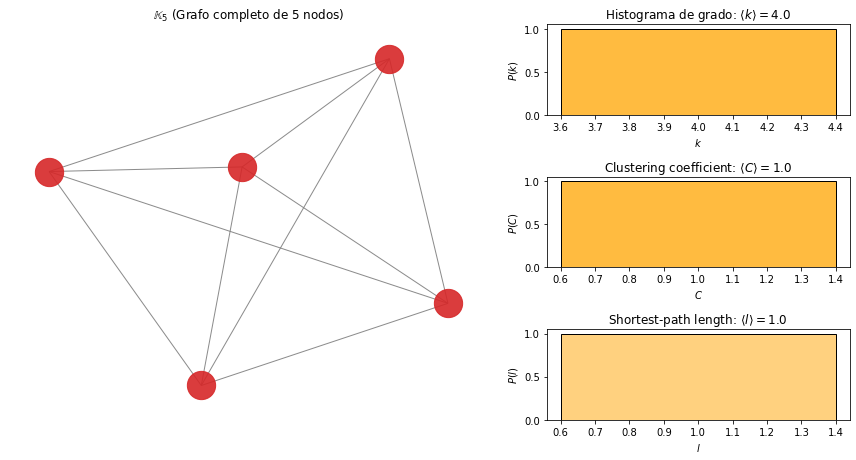

In [4]:
G1 = nx.complete_graph(range(1, 5+1))

degree_analysis(G1, title=r"$\mathbb{K}_5$ (Grafo completo de 5 nodos)", **options1)

### 1. b) Árbol binario de $n$ niveles

In [5]:
def sum_powers(n):
    if n == 0:
        s = 1
    else:
        s = 2**n + sum_powers(n-1)
    return s 
# --------------------------------------------------
def dict_binary_tree(n):
    B = dict()
    s = []
    for i in range(sum_powers(n)):
        B[i+1] = 0
    for j in range(n+1):
        s.append(range(2**j, sum_powers(j)+1))
    for j in range(n):
        for k in range(len(s[j])):
            B[s[j][k]] = s[j+1][2*k], s[j+1][2*k+1]
    return B
# --------------------------------------------------
def binary_tree(n):
    B = dict_binary_tree(n)
    G = nx.Graph()
    s = []
    for i in B:
        if B[i] == 0:
            pass
        else:
            for j in B[i]:
                G.add_edge(i,j)
    return G

<Figure size 1080x360 with 0 Axes>

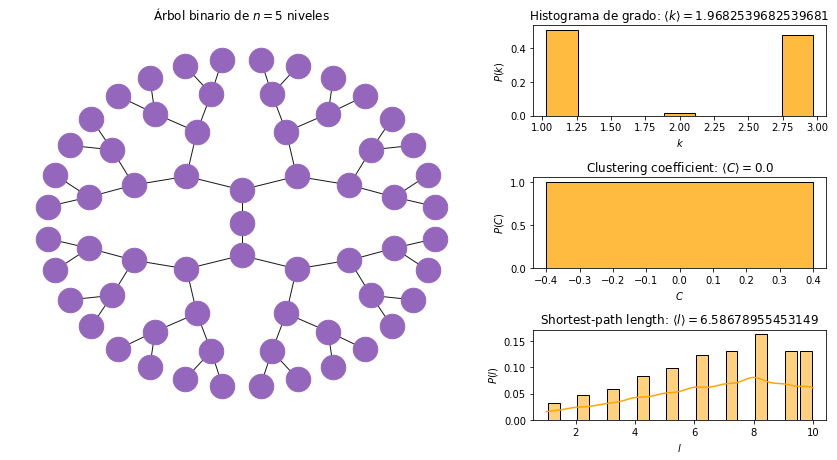

In [6]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

G2 = binary_tree(5)

pos = graphviz_layout(G2, prog="twopi")
plt.figure(figsize=(15,5))

degree_analysis(G2, pos=pos, title=r"Árbol binario de $n=5$ niveles", **options2)

### 1. c) Grafo regular de 1D

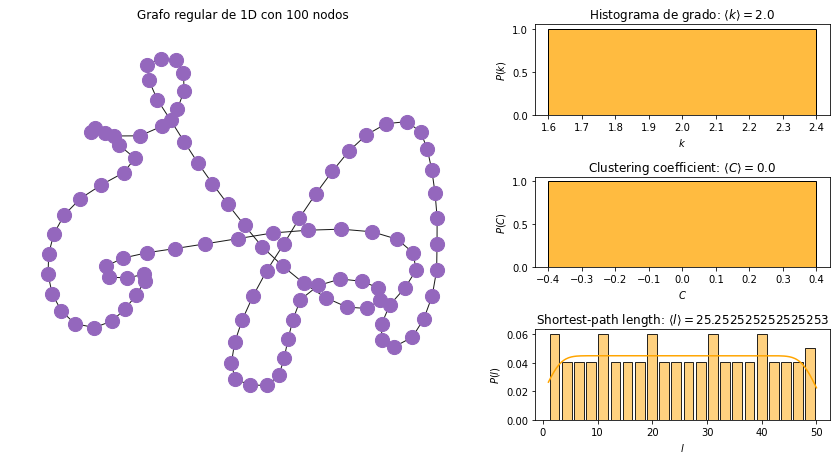

In [7]:
G3 = nx.grid_graph([100], periodic=True)

degree_analysis(G3, title=r"Grafo regular de 1D con 100 nodos", **options3)

### 1. d) _Lattice_ regular de 2D

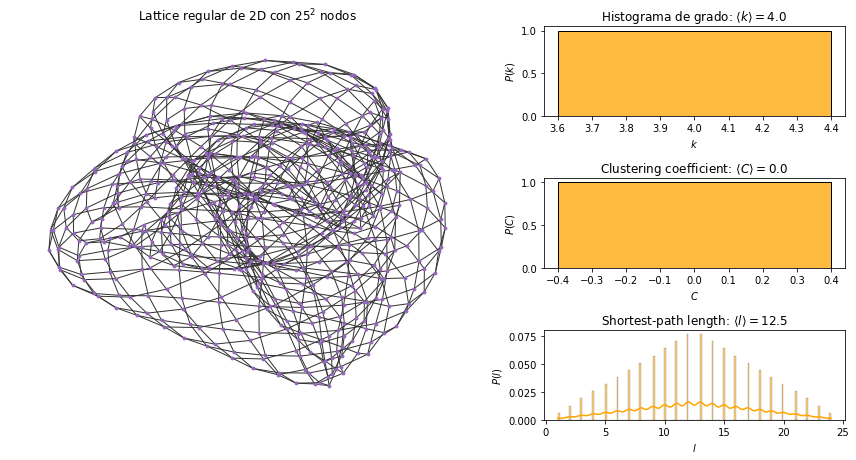

In [8]:
G4 = nx.grid_graph([25,25], periodic=True)

degree_analysis(G4, title=r"Lattice regular de 2D con $25^2$ nodos", **options4)

### 2. a) Red no dirigida de tamaño $N$ en la que cada nodo tiene grado $k=1$

In [9]:
def dict_graph_k1(n):
    B = dict()
    s = []
    for i in range(n//2):
        B[2*i+1] = [2*(i+1)]
    return B
# --------------------------------------------------
def graph_from_dict(dict_graph):
    B = dict_graph
    G = nx.Graph()
    s = []
    for i in B:
#         print(i)
        if B[i] == 0:
            pass
        elif len(B[i]) == 1:
            G.add_edge(i,B[i][0])
        else:
            for j in range(len(B[i])):
#                 print(j)
                G.add_edge(i,B[i][j])
    return G

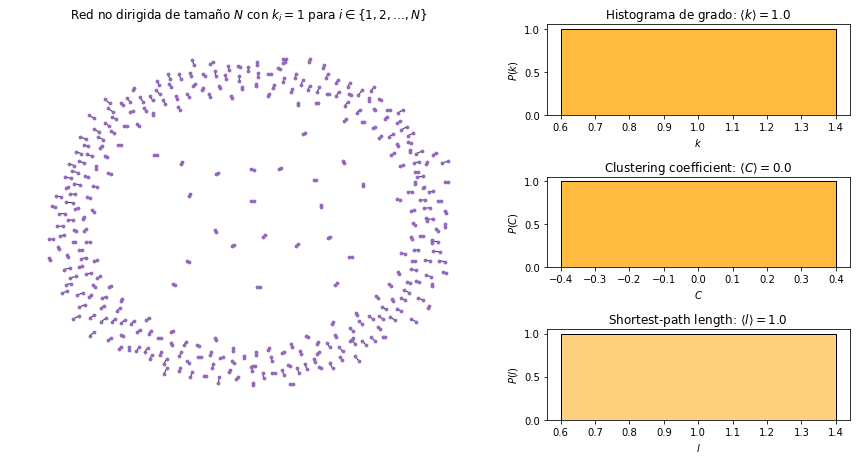

In [10]:
B1 = dict_graph_k1(600)
G5 = graph_from_dict(B1)

degree_analysis(G5, title=r"Red no dirigida de tamaño $N$ con $k_i=1$ para $i\in \{1,2,\dots,N\}$", **options4)

### 2. b) Red no dirigida de tamaño $N$ en la que cada nodo tiene grado $k=2$ y $C=1$

In [11]:
def dict_graph_k2(n):
    B = dict()
    s = []
    for i in range(n//3):
        B[3*i+1] = [3*i+2, 3*i+3]
        B[3*i+2] = [3*i+3]
    return B

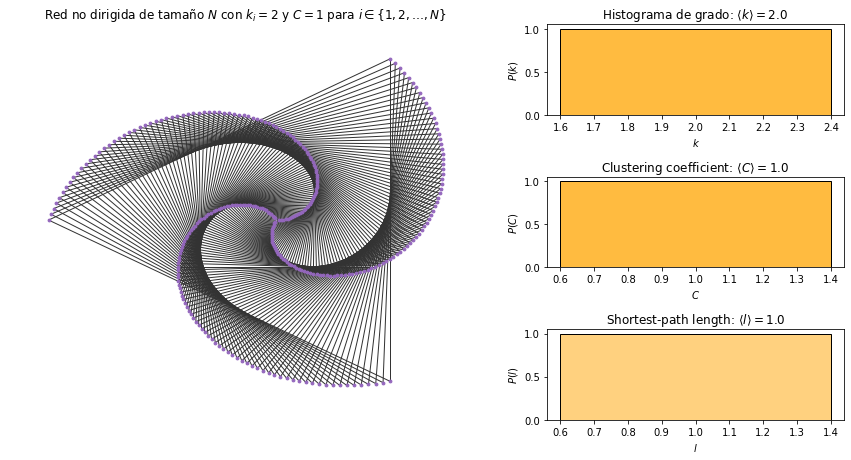

In [12]:
n = 300;
B2 = dict_graph_k2(n)
G6 = graph_from_dict(B2)

shells = []
for i in range(n//3):
#     print(i)
    shells.append(np.arange(3)+3*i+1)
pos = nx.shell_layout(G6, shells)

degree_analysis(G6, pos=pos, title=r"Red no dirigida de tamaño $N$ con $k_i=2$ y $C=1$ para $i\in \{1,2,\dots,N\}$", **options4)

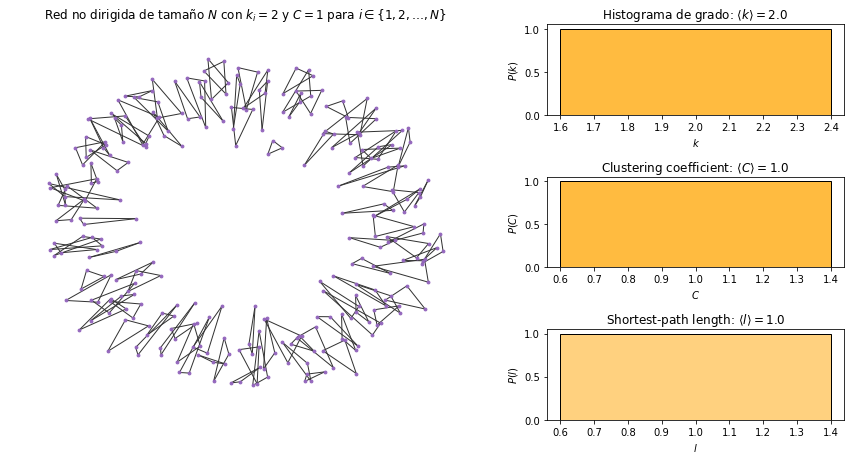

In [13]:
n = 300;
pos = nx.spring_layout(G6, k=50/n, iterations=30)

degree_analysis(G6, pos=pos, title=r"Red no dirigida de tamaño $N$ con $k_i=2$ y $C=1$ para $i\in \{1,2,\dots,N\}$", **options4)

## Modelo de Erdös-Rényi


\begin{align*}
    P(k) &= \begin{pmatrix} N-1 \\ k \end{pmatrix} (p_c)^k \left(1-p_c\right)^{N-1-k} &\text{(Caso discreto})\\
    P(k) &= e^{-\langle k\rangle}\frac{\langle k\rangle^k}{k!},\ \quad\  \langle k\rangle=p(N-1) &\text{(Caso continuo)}
\end{align*}

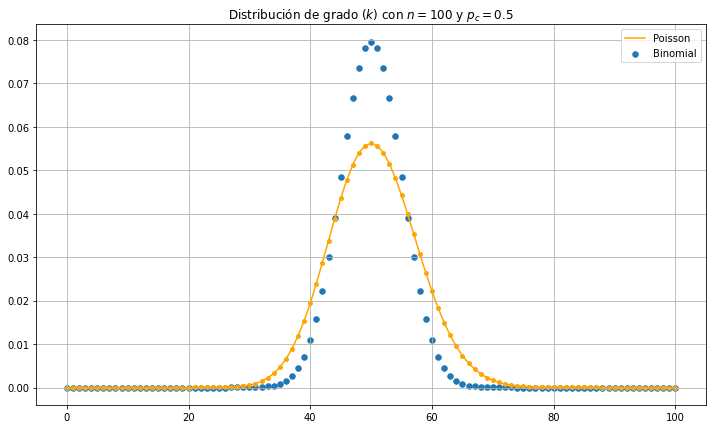

In [14]:
from scipy.stats import binom

n = 100;
p = 0.5;
X = np.arange(0, n+1, 1, dtype=int)

def f1(x, n, p):
    k = p*(n+1)
    return np.exp(-k)*(k**x) / np.math.factorial(x)
   
y1 = binom.pmf(X, n, p)
y2 = [f1(x, n, p) for x in X]   

plt.figure(figsize=(12,7))
plt.title("Distribución de grado ($k$) con $n=100$ y $p_c=0.5$")
plt.scatter(X, y1, label="Binomial", s=30)
plt.scatter(X, y2, c="orange", s=15)
plt.plot(X, y2, label="Poisson", c="orange")
plt.legend()
plt.grid()
plt.show()

### 5. Redes ER con $N=1000$ y $N=10,000$ nodos con 5 valores diferentes de $p_c$ 

In [15]:
n = np.array([1000, 10000])
p1 = np.array([0.000001,  0.00001, 0.0001, 0.001, 0.01]);
p2 = np.array([0.00000001, 0.0000001, 0.000001,  0.00001, 0.0001]);

In [16]:
G7_a = []
for i in range(len(p1)):
    G7_a.append(nx.erdos_renyi_graph(n[0], p1[i]))

G7_b = []
for i in range(len(p2)):
    G7_b.append(nx.erdos_renyi_graph(n[1], p2[i]))

In [17]:
def visualize_ER(graphs, p, pos=None, title=None, with_labels=False, **options):
    
    N = len(graphs)
    axgrid = fig.add_gridspec(3, 3*N)
    axs = []
    titlex = []
    for i in range(N):    
        axs.append(fig.add_subplot(axgrid[:,i*3:(i+1)*3,]))
        titlex.append(r"$p =$" + str(p[i]))
        nx.draw_circular(graphs[i], with_labels=with_labels, **options)
        axs[-1].set_title(titlex[-1])
        axs[-1].set_axis_off()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(title, fontsize=13)

    plt.show()

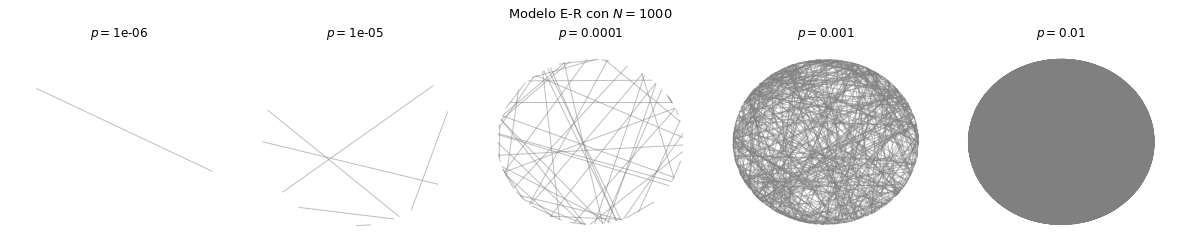

In [18]:
fig = plt.figure(figsize=(16.5, 3.6))
visualize_ER(G7_a, p1, title=r"Modelo E-R con $N=1000$", **options6)

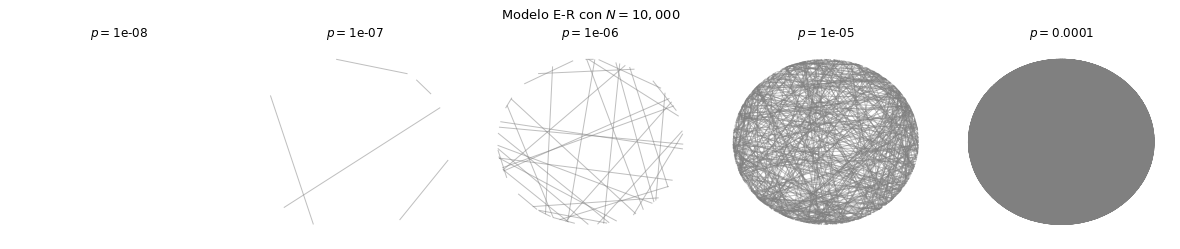

In [19]:
fig = plt.figure(figsize=(16.5, 3.6))
visualize_ER(G7_b, p2, title=r"Modelo E-R con $N=10,000$", **options6)

### 7. Escriba un programa que genere redes de $N = 3000$ nodos con el modelo de Erdös-Rényi en función de $\langle k\rangle$ y que genere un gráfico de $\langle k\rangle =z$ vs la fracción de nodos $p$ conectados al componente más grande (“isla gigante”) donde se muestre que a partir de $z = 1$ existe una transición de fase, en la cual la red **percola** hacia un sólo componente gigante

In [20]:
N = 3000
z = np.arange(0,2.5,0.025)

pc = (lambda x: x/(N-1))(z)
p1, p2 = [], []

for j in range(len(z)):
    G8_a = nx.fast_gnp_random_graph(N, pc[j])
    G8_b = nx.fast_gnp_random_graph(N, pc[j])
    largest_cc1 = max([len(c) for c in sorted(nx.connected_components(G8_a), key=len, reverse=True)])
    largest_cc2 = max([len(c) for c in sorted(nx.connected_components(G8_b), key=len, reverse=True)])
    p1.append(largest_cc1/N)
    p2.append(largest_cc2/N)

p1 = np.array(p1)
p2 = np.array(p2)

p = (p1+p2)/2

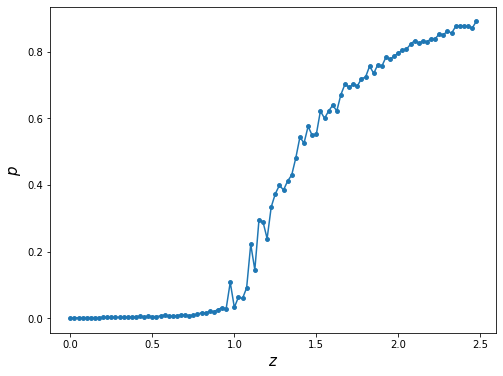

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(z, p, s=15, label="a")
plt.plot(z, p)
plt.xlabel("$z$", fontsize=15); plt.ylabel("$p$", fontsize=15)
plt.show()

## Modelo de Watts-Strogatz

### 9. Usando la biblioteca $\texttt{NetworkX}$ genere a partir del modelo WS, redes de $N = 100$ nodos y $k = 4$ (número de conexiones para vecinos cercanos de cada nodo), usando valores $p_w = 0$, $p_w = 0.001$, $p_w = 0.01$, $p_w = 0.1$, $p_w = 0.5$, $p_w = 0.75$, $p_w = 1$, de la probabilidad de reconexión. Muestre las figuras de las mismas usando un *Layout* circular.

In [22]:
n = 100; k = 4;
p = np.array([0, 0.001, 0.01, 0.1, 0.5, 0.75, 1])

G9 = [];
for i in range(len(p)):
  G9.append(nx.watts_strogatz_graph(n, k, p[i]))

In [23]:
def visualize_WS(graphs, p, title=None, with_labels=False, **options):
    
    N = len(graphs)
    axgrid = fig.add_gridspec(4, 3*N)
    axs = []
    titlex = []
    for i in range(N):    
        axs.append(fig.add_subplot(axgrid[:,i*3:(i+1)*3]))
        titlex.append(r"$p =$" + str(p[i]))
        nx.draw_circular(graphs[i], with_labels=with_labels, **options)
        axs[-1].set_title(titlex[-1])
        axs[-1].set_axis_off()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(title, fontsize=13)
    
    plt.show()

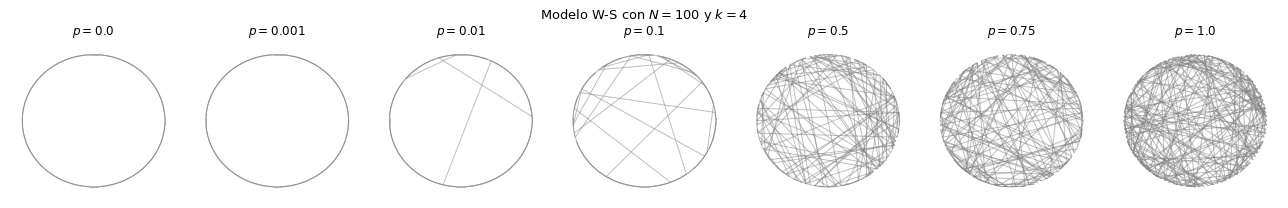

In [24]:
fig = plt.figure(figsize=(18, 3))
visualize_WS(G9, p, title=r"Modelo W-S con $N=100$ y $k=4$", **options6)

### 10. Escriba un programa que genere redes con el modelo de Watts-Strogatz en función de $p_w$ y que genere un gráfico de $p_w$ vs $\langle C(p_w)\rangle/C_0$ y $\langle l(p_w)\rangle/l_0$, que muestre que cierto régimen del valor de $p_w$ las redes generadas por el modelo muestran características similares a las redes reales (es decir, genere el gráfico mostrado por Watts y Strogatz en su articulo en *Nature* de 1998.


In [25]:
def WS_nature(n, k, p):
    G = nx.watts_strogatz_graph(n, k, 0)
    C_0 = nx.average_clustering(G)
    l_0 = nx.average_shortest_path_length(G)
    C = []; l = [];

    for i in range(len(p)):
        G = nx.watts_strogatz_graph(n, k, p[i])
        C.append(nx.average_clustering(G)/C_0)
        l.append(nx.average_shortest_path_length(G)/l_0)
    C = np.array(C); l = np.array(l)

    plt.scatter(p, C, label=r"$C(p_w)/C_0$", c="blue", s=40, marker="s", facecolors="none")
    plt.scatter(p, l, label=r"$l(p_w)/l_0$", c="purple", s=40)
    plt.xscale("log")
    plt.legend(fontsize=15)
    plt.xlabel("$p$", fontsize=15)
    plt.show()

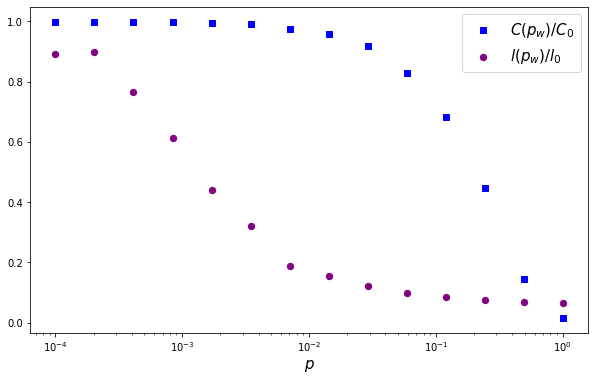

In [26]:
n = 1000; k = 10;
p_w = np.logspace(-4, 0, num=14, endpoint=True)

plt.figure(figsize=(10,6))
WS_nature(n, k, p_w)

### 11. b) Muestre la expresión analítica de la distribución de grado $P(k)$ y dibuje un diagrama de $P(k)$ vs. $k$ y $\log(P(k))$ vs. $\log(k)$ de la misma.

\begin{align*}
    P(k) = k^{-\gamma},\qquad \gamma \geq 0
\end{align*}

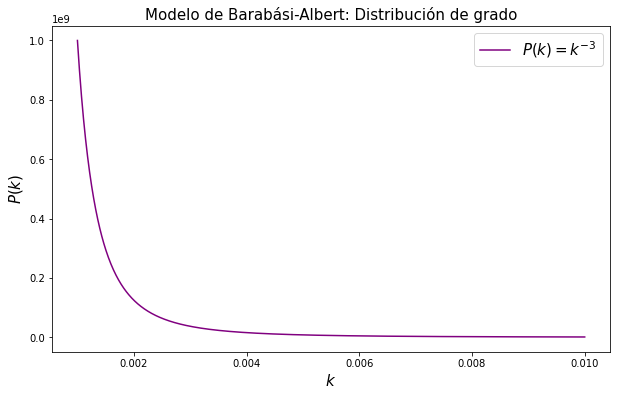

In [53]:
gamma = 3
k1 = np.linspace(0.001,0.01, 1000)
P1 = (lambda x, gamma: x**(-gamma))(k1, gamma)

plt.figure(figsize=(10,6))
plt.plot(k1, P1, c="purple", label=r"$P(k)=k^{-3}$")
# plt.xscale("log"); plt.yscale("log");
plt.legend(fontsize=15)
plt.title(r"Modelo de Barabási-Albert: Distribución de grado", fontsize=15)
plt.xlabel("$k$", fontsize=15); plt.ylabel("$P(k)$", fontsize=15)
plt.show()

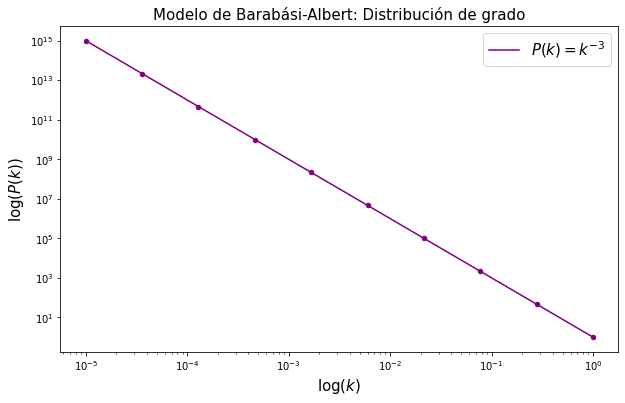

In [54]:
gamma = 3
k2 = np.logspace(-5,0, num=10)
P2 = (lambda x, gamma: x**(-gamma))(k2, gamma)

plt.figure(figsize=(10,6))
plt.plot(k2, P2, c="purple", label=r"$P(k)=k^{-3}$")
plt.scatter(k2, P2, c="purple", s=20)
plt.xscale("log"); plt.yscale("log"); 
plt.legend(fontsize=15)
plt.title(r"Modelo de Barabási-Albert: Distribución de grado", fontsize=15)
plt.xlabel("$\log(k)$", fontsize=15); plt.ylabel("$\log(P(k))$", fontsize=15)
plt.show()

### 12. Usando la biblioteca $\texttt{NetworkX}$ genere a partir del modelo BA, redes de $N = 1000$ y $N = 10,000$ nodos usando 5 diferentes valores de $m_0$ (el número de enlaces inicial para cada nodo nuevo que entra a la red).

In [76]:
n = [1000,10000]
m_0 = [1,2,3,4,5,6]

G12_a = []
for i in range(len(m_0)):
    G = nx.barabasi_albert_graph(n[0], m_0[i])
    G12_a.append(G)

G12_b = []
for i in range(len(m_0)):
    G = nx.barabasi_albert_graph(n[1], m_0[i])
    G12_b.append(G)

In [114]:
def visualize_BA(graphs, m, pos=None, title=None, with_labels=False, **options):
    
    N = len(graphs)
    axgrid = fig.add_gridspec(3*2, 3*N//2)
    axs = []
    titlex = []
    for i in range(N):    
        x = (i//3)*3; y = (i%3)*3
        axs.append(fig.add_subplot(axgrid[x:x + 3, y:y+3,]))
        titlex.append(r"$m =$" + str(m[i]))
        pos = nx.spring_layout(graphs[i], iterations=10)
        nx.draw(graphs[i], pos=pos, with_labels=with_labels, **options)
        axs[-1].set_title(titlex[-1])
        axs[-1].set_axis_off()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(title, fontsize=13)

    plt.show()

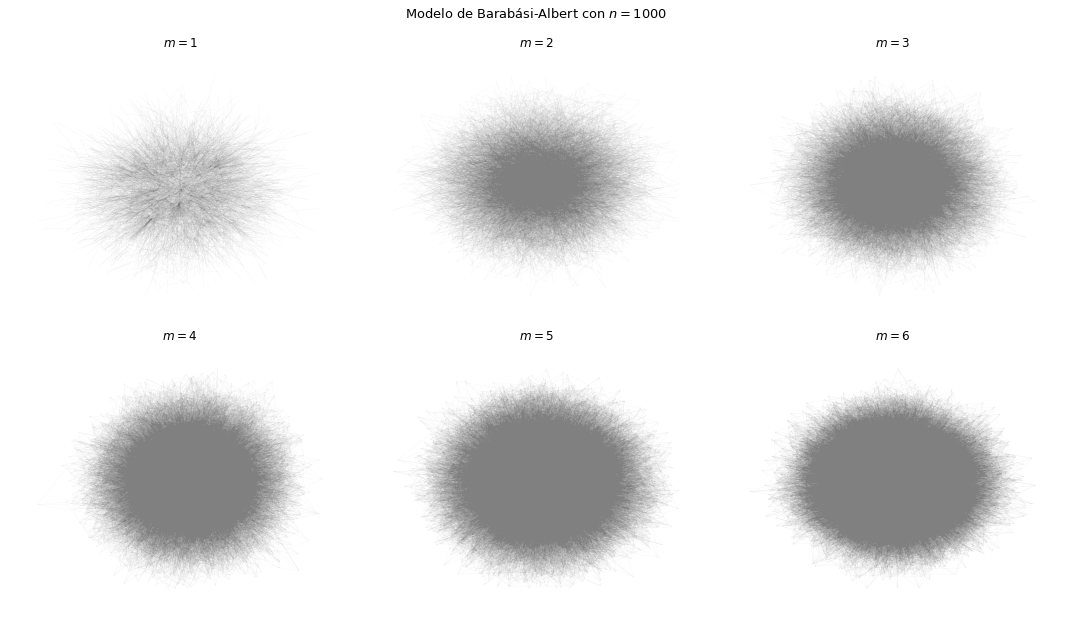

In [115]:
fig = plt.figure(figsize=(15, 9))
visualize_BA(G12_b, m_0, title="Modelo de Barabási-Albert con $n=1000$", with_labels=False, **options6)